In [1]:
import numpy as np
import pandas as pd
import csv
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [2]:
def gabung_tweets(username):
    term = []

    infile = "C:/Users/User/twitter-personality-classification-master/PPT-09/dataset/process/processed-tweets-@" + username + ".csv"
    
    with open(infile, 'r') as file:
        i = 0
        tweets = []
        for row in file:
            if i == 0:
                i += 1
                continue
            row = row.split(',')[1]
            row = row.split('\n')[0]
            tweets.append(row)
        term = ' '.join(tweets)
        return term

In [3]:
list_of_tweets = []
if __name__ == '__main__':
    users = ['achadianrani', 'almostbeyours', 'amarasyawalni', 'erickdidudidu', 'ferrafbryn', 'fridamayanti', 'ichatarina', 'jehademusa', 'laylarmdhnaa', 'lenoydew', 'liawrdhani', 'munawaroh_mona', 'nysmonworld', 'shafiraara', 'siti_sr137', '9ita7unn', '_avocada', '_chaendelier_', '_marfami', '_nilazka', '_sylvialestari', 'a2lir', 'abcdenjiii', 'adamumemo', 'adewiana14', 'adindahapsa', 'adityalinardi', 'adityandr', 'adityosusanto_', 'adlfynf', 'adorablejuneya', 'adputri_', 'afidazkyy', 'agus_trianto', 'aisyahafr', 'aiuchida', 'akhsaraa', 'akuuuberuang', 'alaaini1', 'alaniafitri', 'aldimaulana48', 'alfian_ay', 'alfinalfinn', 'alfrisadivaw', 'aliencuk', 'alifahdellaf', 'alitapuspa_', 'amalianadiene', 'amandapht', 'amhryn', 'amindwiananda', 'ana_ot', 'anakyangtangkas', 'andiniayu', 'andrisuartikaa', 'anggycaa', 'anissa_sani', 'anzjani', 'apaanmanggil', 'apdesti_', 'arangkecap', 'ardianitaap', 'ariefpopoh', 'arindyaf', 'arisetiyani12', 'arizamarine', 'arrrasseo', 'artikakristi', 'asriyahasry', 'astikhairunnisa', 'astridvivianni', 'astrifaj', 'ath_tobe', 'athayaanabila', 'attamufid', 'auliapramudya_', 'avidazr', 'awwlltl', 'ayrachma', 'azharizkita', 'azwardfauzan', 'baksopangsitnya', 'bananamilxxx', 'belfiani', 'benrskbyg', 'bestchrysalis', 'bettyindahr', 'betyratih', 'bibblegumm_', 'bintangphy', 'biyaanhaz', 'bodoamatbrou', 'borahyungg', 'brilliaflah', 'bukandove', 'bukanrohalia', 'bvdztkvlr', 'canc_ers', 'ccarenth', 'chandnidevi', 'chndooy', 'chtime__', 'chyntw_', 'cipipiw', 'citora_', 'claraang09', 'classmlild', 'copcopiaa', 'crysandh', 'dafugmbah', 'dalgonasachet', 'dannytandean', 'daranagas', 'darna17', 'dartina_', 'deliahndt', 'dellapj_', 'dennisransun', 'denokdhena', 'destaard', 'destandriyani', 'destychaniaa', 'detiaferlian', 'devia_riskaa', 'dewirossilia', 'dheaniranabila', 'dikmabelarosa', 'diniheryani', 'dippp_p', 'ditdandep', 'dsnmld', 'duwaaaay', 'dwiahkam', 'dwidys_', 'dwraoktavia', 'dyeah13', 'dzakimadhani', 'dzakyhaidar__', 'effendisgurl', 'egabetari', 'ejakulasi_', 'ekahanda', 'elidoff', 'emanggemeshin', 'erisyaeris', 'ervhans', 'esjaeruk', 'estlrsty', 'evaxevi', 'eyaaaxx', 'fadfadholic', 'fanirchm27', 'farahmhdyyh', 'febrianirevita', 'fia_lutfiazhari', 'fildzahanais', 'finaihsani', 'firda0305', 'firdahanifa_', 'firstyfelanda', 'fitriindy', 'fitrisip', 'g1tsy', 'ghias_yusuf', 'gieskalaila', 'gorjesparkle', 'gramelt', 'granweastery', 'greeniscalming', 'grestina', 'griffitpypiet', 'gthagrace', 'gustianarii', 'h3llatrash', 'haluhaluclubbb', 'hani_ristiawan', 'hapsarihn', 'hasinanr', 'hawaariyy', 'hazizaanifa', 'hermajestyrania', 'heyhestyy', 'hidadahida', 'hkawilarangg', 'hlutami', 'husnavinaa', 'hypertenshit', 'i_frankenstein', 'ibnubons', 'idrisg8', 'iffamee', 'iftitahptr', 'ikhwaaaaann', 'ilma678', 'imaashoima', 'imadamii', 'imfnia', 'indahastikas', 'inditarizky', 'indraszlaila', 'indrayyyy_', 'inesprat_', 'inkafbrn', 'innocentpep', 'intansakina28', 'introperti', 'iqbalpaz', 'ireenarum', 'isnakhairi', 'itshardys', 'ivyeol', 'januarrmdhn', 'joabaldo', 'joeniararief', 'jollajoly', 'juliandennis1', 'juliepuspita01', 'jundie_m', 'jusrambai', 'juwitasdrman', 'kalisnakal', 'kasurjalan', 'kasurlante', 'kawaipuna_', 'keiziasyf', 'kepikbesar', 'kerakteloorr', 'kharismagpri', 'khelian_ni_s', 'ki_cuu', 'kimsatgat2', 'kirannaurora', 'kodelle_', 'kokocrvnch', 'komalasari_ak', 'krisnawah', 'kucingsmanda_', 'kumanokabe_', 'ladafiq', 'lailapurnamas', 'lalenamanoban', 'latifanajla__', 'latifasyf', 'leoagung98', 'lerinarin', 'liawatii_', 'liayurh_', 'liestianoviani', 'linggaralfi', 'liputarinns', 'llakhr', 'lulufrdni', 'marisahafsyah94', 'maulanariandi', 'mautongue', 'megapsmr', 'mellamotis', 'melyst94', 'meniaclosia', 'messylusmitha', 'metinaayu_', 'micinsassae', 'miftahulilma10', 'mininoenk', 'msyitams', 'muthiaf10', 'nabilatunss', 'nadhira42', 'nadiadjibran', 'nadihng', 'nadyaulfahn', 'nailazulfanz', 'nanasambara', 'nanuazz', 'nauli_permata', 'nevienpan', 'niazmi_', 'nidakarin', 'nneninot1996', 'nopiynovi', 'normalvira', 'novia_pqr', 'novitakurniap', 'novitnurul', 'nstlstnngrm', 'nurulainiii', 'nwindaputri', 'ociirosiana', 'okkyskripsi', 'okyranda', 'oneperson01_', 'ovilsp', 'owkowkok', 'oziechonky', 'pelangikecilll', 'phoebee_ip', 'pinchipowww', 'pinochiao', 'pocagurii', 'prastikavivi', 'prialitaf', 'ptorianns', 'pujaypujilpuu', 'pujisay', 'punyauname', 'puspapradinaa', 'puten_hijau', 'puteriroro', 'putriyuniardi', 'qthrnnada', 'r_fiika', 'rafitaasr', 'rahmaarindapp', 'rahmahwanti', 'rahmatfathoni', 'rallyanta', 'ramdaneinstein', 'rdtlfiqryaj', 'readytomingie', 'rianita_sm', 'rierabcd', 'risdahlbs', 'riskaadesuryani', 'rizka_christian', 'rizkaaulia', 'rizol_rizal', 'rkhusfa', 'rkismaniar', 'rohanahrey', 'rpdelimaa', 'rvghalif', 'rzqmentari', 'saccharinande', 'salisnurk', 'salsabilabia', 'saraadaay', 'sartikadesi212', 'savirapu', 'scharrii', 'seacrabble', 'sefticare', 'sekarumn', 'selftalker', 'sfaui', 'shelfiw', 'shobronabadan', 'silmiotmiot', 'silvialucyana', 'silvihoroni', 'siti89nurjanah', 'slvdys', 'sobatqasurr', 'sora_alxean', 'stephanieayuu', 'stillyourbae', 'strybycy', 'stttopp', 'sulisprstya', 'sundalaif', 'susheetrashh', 'susiindah16', 'syifa_syifo', 't_gooners16', 't_hndr', 'tahtaallfina', 'taritahir', 'tastyducky', 'tiaraindhprmt', 'timutiimuti', 'tnrx_', 'tramadanur', 'triaisharaa', 'trisawardanis', 'ucciiill', 'ugitugitmiskoi', 'upikmera', 'ursnflwr_', 'ussiiyy', 'utho_', 'v3isvthree', 'vanillasvgar', 'viasyafiqa', 'viragutubela', 'virraaa_', 'vnyriany', 'wequte', 'wulandrshrmn', 'wydyudi_', 'yaelahir', 'yokozka', 'youcan_it', 'yovimelan', 'ysyni', 'yudkuswar', 'yulfaariza', 'yulia_danche', 'yuliawafa', 'yusrinasmarani', 'yuuta__96', 'zea_mays07']

    for user in users:
        list_of_tweets.append(gabung_tweets(user))

In [4]:
print(len(list_of_tweets))

400


In [5]:
print(len(users))

400


In [6]:
list_of_tweets[:2]

['apa benar bapak tawa kalau standar tidak sesuai sama mampu anda arti target bukan anda buat standar sendiri lah mati gaya sekali tidak punya stok kopi sudah telepon bas jam sampai congenya nimbun eh mesti mantau laki tweet iya kasi sekali waktu jam buang anda anda cuma buat naracap tenang mas bebas tugas cuci piring malam saya jadi pikir buat bikinin sedih sekali kalau bapak mertua saya ngejokes suka bilang garing sama anak sendiri kalau facebook mungkin blio dapat banyak suka tertawa reaksi dari khalayak ramai bapak mertua saya kalau buat akun facebook mungkin isi kurang lebih begini tidak sih kalau naik motor lewat gang sempit tidak usah ngeklakson kencang sekali anda suruh anak anak mingir pakai mulutlu akan kedengeran se retweet bodoh sekali memang manusia manusia susah susah bangun citra diancurin sama admin instagram holywings tawa seru ini cinta sekali sama negara apansih biadab milik anda bohong in april ngebosenin baru episode sudah malas ngelanjutin butuh sebuah istirahat t

In [7]:
df = pd.DataFrame({
    'username': users,
    'tweets': list_of_tweets
})

In [8]:
df.head(20)

,username,tweets
0,achadianrani,apa benar bapak tawa kalau standar tidak sesua...
1,almostbeyours,hampir bulan gaperna nge mall jalan delta bent...
2,amarasyawalni,kejut saya rasa bangga tawa hai mana saya tahu...
3,erickdidudidu,taklami gakpapa sudah takala goa kalau turun g...
4,ferrafbryn,memang bapak kenapa laki sekali hobi antem gem...
5,fridamayanti,ke buka ulang jam gin sudah ngantri camat buat...
6,ichatarina,kalau pasang instagram kuat mental eh pipi ciu...
7,jehademusa,begitu mohon balas tweet yang admin cc wakil r...
8,laylarmdhnaa,insekyur tonton sampai habis asik euy dandutan...
9,lenoydew,iya tidak sebut nama dokter balas twetnya sepe...


In [9]:
df_labels_user = pd.read_csv('C:/Users/User/twitter-personality-classification-master/PPT-09/dataset/label-result.csv')

In [10]:
df_labels_user

,username,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Label
0,h3llatrash,1.25,0.00,4.44,6.25,8.0,Openness
1,azharizkita,3.75,2.22,5.56,5.00,6.0,Openness
2,jooshpn,1.25,2.22,5.56,0.00,2.0,Conscientiousness
3,firazulfira,2.50,3.33,5.56,3.75,7.0,Openness
4,aisyahafr,3.75,4.44,4.44,5.00,5.0,Neuroticism
...,...,...,...,...,...,...,...
730,pawidyapramesti,2.50,3.33,2.22,6.25,3.0,Neuroticism
731,greeniscalming,5.00,3.33,5.56,1.25,7.0,Openness
732,meghayusyaedmap,2.50,4.44,2.22,5.00,2.0,Neuroticism
733,Freak people,0.00,2.22,1.11,6.25,1.0,Neuroticism


In [11]:
df_copy = df.copy()

In [12]:
df_combined = df_copy.merge(df_labels_user, left_on='username', right_on='username')

In [13]:
df_combined.head()

,username,tweets,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Label
0,achadianrani,apa benar bapak tawa kalau standar tidak sesua...,1.25,1.11,1.11,3.75,3.0,Neuroticism
1,almostbeyours,hampir bulan gaperna nge mall jalan delta bent...,3.75,5.56,4.44,6.25,2.0,Neuroticism
2,amarasyawalni,kejut saya rasa bangga tawa hai mana saya tahu...,3.75,5.56,1.11,5.00,2.0,Agreeableness
3,erickdidudidu,taklami gakpapa sudah takala goa kalau turun g...,6.25,4.44,5.56,5.00,4.0,Extraversion
4,ferrafbryn,memang bapak kenapa laki sekali hobi antem gem...,3.75,2.22,1.11,0.00,0.0,Extraversion


In [14]:
df_combined = df_combined.drop(['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'], axis=1)

In [15]:
df_combined.head()

,username,tweets,Label
0,achadianrani,apa benar bapak tawa kalau standar tidak sesua...,Neuroticism
1,almostbeyours,hampir bulan gaperna nge mall jalan delta bent...,Neuroticism
2,amarasyawalni,kejut saya rasa bangga tawa hai mana saya tahu...,Agreeableness
3,erickdidudidu,taklami gakpapa sudah takala goa kalau turun g...,Extraversion
4,ferrafbryn,memang bapak kenapa laki sekali hobi antem gem...,Extraversion


In [16]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  400 non-null    object
 1   tweets    400 non-null    object
 2   Label     400 non-null    object
dtypes: object(3)
memory usage: 12.5+ KB


In [17]:
df_combined.duplicated().sum()

0

In [18]:
df_combined.isnull().sum()

username    0
tweets      0
Label       0
dtype: int64

In [19]:
import seaborn as sns

Text(0.5, 1.0, 'Tweets Distribution by Label')

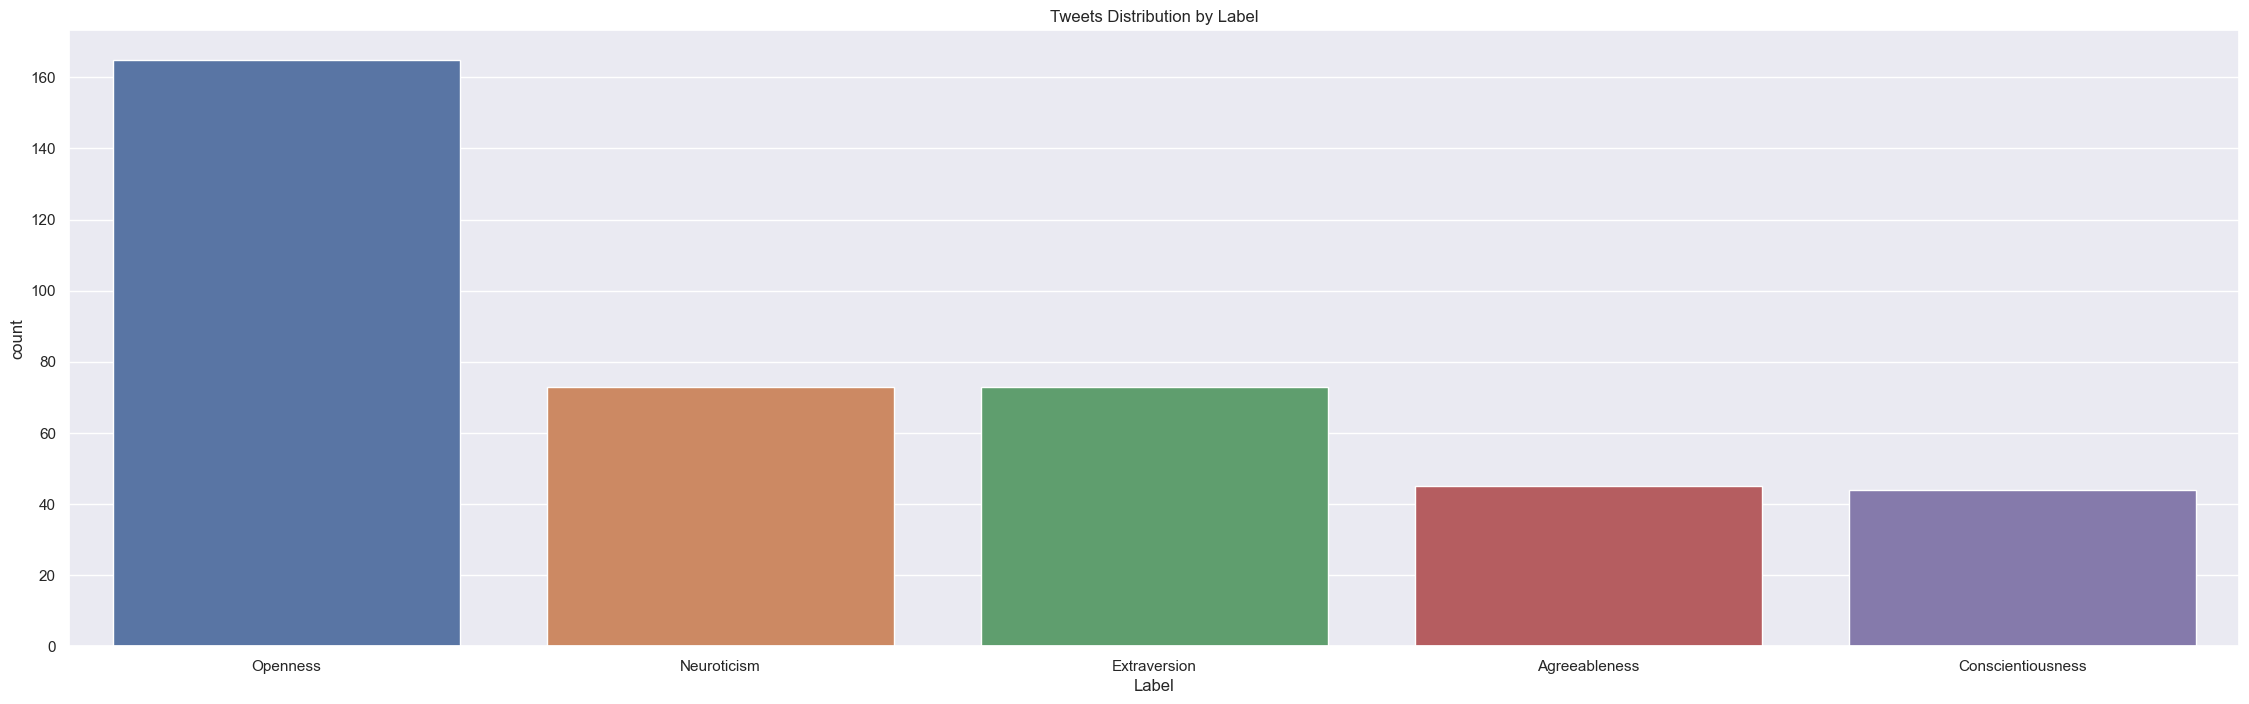

In [20]:
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="Label", data=df_combined, order=df_combined.Label.value_counts().index).set_title("Tweets Distribution by Label")

In [21]:
df_combined['Label'].value_counts()

Openness             165
Neuroticism           73
Extraversion          73
Agreeableness         45
Conscientiousness     44
Name: Label, dtype: int64

In [22]:
print(df_combined.Label.value_counts(normalize=True).mul(100).round(3).astype(str) + '%')

Openness             41.25%
Neuroticism          18.25%
Extraversion         18.25%
Agreeableness        11.25%
Conscientiousness     11.0%
Name: Label, dtype: object


## Model

In [23]:
d = {
     'Neuroticism': 0,
     'Agreeableness': 1,
     'Extraversion': 2,
     'Openness': 3,
     'Conscientiousness': 4
}

In [24]:
df_model = df_combined.copy()

In [25]:
df_model['Label'] = df_model['Label'].apply(lambda x: d[x])

In [26]:
df_model.head()

,username,tweets,Label
0,achadianrani,apa benar bapak tawa kalau standar tidak sesua...,0
1,almostbeyours,hampir bulan gaperna nge mall jalan delta bent...,0
2,amarasyawalni,kejut saya rasa bangga tawa hai mana saya tahu...,1
3,erickdidudidu,taklami gakpapa sudah takala goa kalau turun g...,2
4,ferrafbryn,memang bapak kenapa laki sekali hobi antem gem...,2


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
transformed_output = v.fit_transform(list_of_tweets)

In [28]:
v.vocabulary_

{'apa': 1469,
 'benar': 3240,
 'bapak': 2730,
 'tawa': 34981,
 'kalau': 16087,
 'standar': 33692,
 'tidak': 35745,
 'sesuai': 32235,
 'sama': 30947,
 'mampu': 20560,
 'anda': 1126,
 'arti': 1736,
 'target': 34893,
 'bukan': 4693,
 'buat': 4598,
 'sendiri': 31954,
 'lah': 18955,
 'mati': 21060,
 'gaya': 11381,
 'sekali': 31632,
 'punya': 29056,
 'stok': 33795,
 'kopi': 18220,
 'sudah': 33931,
 'telepon': 35177,
 'bas': 2825,
 'jam': 15039,
 'sampai': 30989,
 'congenya': 6248,
 'nimbun': 25111,
 'eh': 9301,
 'mesti': 21875,
 'mantau': 20738,
 'laki': 18989,
 'tweet': 36688,
 'iya': 14823,
 'kasi': 16464,
 'waktu': 37875,
 'buang': 4595,
 'cuma': 6564,
 'naracap': 23327,
 'tenang': 35271,
 'mas': 20917,
 'bebas': 3012,
 'tugas': 36494,
 'cuci': 6519,
 'piring': 28079,
 'malam': 20459,
 'saya': 31306,
 'jadi': 14915,
 'pikir': 27949,
 'bikinin': 3747,
 'sedih': 31536,
 'mertua': 21850,
 'ngejokes': 24288,
 'suka': 33997,
 'bilang': 3760,
 'garing': 11278,
 'anak': 1074,
 'facebook': 10076,

In [29]:
all_features = v.get_feature_names_out()
all_features

array(['aa', 'aah', 'ab', ..., 'zx', 'zxfhshur', 'zxfhszitr'],
      dtype=object)

In [30]:
for word in all_features:
    index = v.vocabulary_.get(word)
    print(word, v.idf_[index])

aa 3.4676009026904078
aah 4.691376334312523
ab 5.895349138638459
aba 5.895349138638459
ababil 6.300814246746624
ababwa 6.300814246746624
abacdefhz 6.300814246746624
abad 4.429012069845033
abadi 4.429012069845033
abah 5.202201958078514
abai 3.9494389895831463
abain 6.300814246746624
abal 5.384523514872469
abana 6.300814246746624
abangan 5.6076670661866785
abangkuh 6.300814246746624
abangs 6.300814246746624
abangsayangnya 6.300814246746624
abar 6.300814246746624
abb 6.300814246746624
abba 6.300814246746624
abc 4.914519885626733
abcd 5.895349138638459
abdaubismilahi 6.300814246746624
abdinegara 6.300814246746624
abdo 6.300814246746624
abdu 5.6076670661866785
abdul 5.6076670661866785
abdun 6.300814246746624
abdurohman 6.300814246746624
abe 6.300814246746624
abege 5.895349138638459
abekani 6.300814246746624
abel 6.300814246746624
abelsocialdistancing 6.300814246746624
aber 6.300814246746624
abes 6.300814246746624
abet 6.300814246746624
abib 6.300814246746624
abidin 6.300814246746624
abidzar

arateul 6.300814246746624
arayan 6.300814246746624
arb 6.300814246746624
arbutin 6.300814246746624
arcgis 5.895349138638459
archdaily 6.300814246746624
archi 6.300814246746624
archie 6.300814246746624
archimedes 6.300814246746624
archives 6.300814246746624
ardan 6.300814246746624
ardern 6.300814246746624
ardewshop 6.300814246746624
ardhelia 6.300814246746624
ardhito 4.914519885626733
ardi 6.300814246746624
ardiles 6.300814246746624
ardini 6.300814246746624
arditho 6.300814246746624
arek 4.160748083250353
areke 5.895349138638459
arem 5.895349138638459
arema 5.895349138638459
aremania 6.300814246746624
aremanita 6.300814246746624
aren 4.691376334312523
arena 5.895349138638459
arent 6.300814246746624
arep 3.9494389895831463
aresaresan 6.300814246746624
arg 5.895349138638459
argh 4.691376334312523
arght 6.300814246746624
argo 5.895349138638459
argued 6.300814246746624
arguing 6.300814246746624
argumen 4.796736849970349
argumentasi 6.300814246746624
argumenya 5.895349138638459
arh 6.3008142

belakangna 6.300814246746624
belalai 6.300814246746624
belalak 6.300814246746624
belalang 5.384523514872469
belan 5.895349138638459
belanda 4.691376334312523
belang 5.048051278251256
belanga 5.895349138638459
belanja 2.789268807915603
belanjan 4.914519885626733
belanjanmu 6.300814246746624
belantara 6.300814246746624
belarus 6.300814246746624
belas 4.596066154508199
belasungkawa 6.300814246746624
belati 5.895349138638459
belatung 6.300814246746624
belawan 5.895349138638459
belaz 6.300814246746624
bele 5.6076670661866785
beleh 6.300814246746624
belek 6.300814246746624
belel 6.300814246746624
belenger 6.300814246746624
belepotan 6.300814246746624
belfodil 6.300814246746624
belgium 6.300814246746624
beli 1.2101362449768316
belia 5.895349138638459
beliau 2.8043066852801437
belibet 5.895349138638459
belie 6.300814246746624
beliefs 5.895349138638459
believers 6.300814246746624
believes 6.300814246746624
belikan 4.914519885626733
belikno 6.300814246746624
beling 5.895349138638459
belio 5.0480

canciku 6.300814246746624
canda 2.3689886140222978
candai 6.300814246746624
candak 6.300814246746624
candan 5.202201958078514
candi 4.914519885626733
candice 5.895349138638459
candidates 6.300814246746624
candil 6.300814246746624
candiroto 6.300814246746624
candra 5.895349138638459
candrabaga 6.300814246746624
candu 3.7750856024383683
canduwebtun 6.300814246746624
canes 6.300814246746624
cang 5.895349138638459
cangar 6.300814246746624
cangcorang 6.300814246746624
cangcut 6.300814246746624
canget 6.300814246746624
canggung 4.691376334312523
cangih 4.796736849970349
cangihna 6.300814246746624
cangihnya 6.300814246746624
cangkang 5.6076670661866785
cangkem 6.300814246746624
cangkeman 5.6076670661866785
cangkeme 5.6076670661866785
cangkemku 6.300814246746624
cangkemnya 5.895349138638459
cangkemu 5.895349138638459
cangkeng 6.300814246746624
cangkir 3.4104424888504594
cangkol 6.300814246746624
cangkruk 6.300814246746624
cangkul 6.300814246746624
cangtipnya 5.895349138638459
cangung 5.3845235

dedel 5.895349138638459
dedemit 6.300814246746624
dedeng 6.300814246746624
dedengkot 6.300814246746624
dedenya 5.895349138638459
dedeq 6.300814246746624
dedew 6.300814246746624
dedi 5.384523514872469
dedikasi 5.895349138638459
dedin 6.300814246746624
dedlen 6.300814246746624
dedlenya 6.300814246746624
dedline 6.300814246746624
dedut 6.300814246746624
dedy 4.596066154508199
deeds 6.300814246746624
deep 3.3563752675801832
deeper 6.300814246746624
deepest 5.895349138638459
def 5.384523514872469
default 5.895349138638459
defence 5.895349138638459
defenses 6.300814246746624
defensif 6.300814246746624
defib 6.300814246746624
defile 6.300814246746624
definisi 3.497453865840089
definitely 4.796736849970349
defisiendi 6.300814246746624
defisiensi 6.300814246746624
defisit 5.895349138638459
degdegan 4.049522448140129
degdeganya 6.300814246746624
degdegkan 6.300814246746624
degirol 6.300814246746624
degradasi 6.300814246746624
degup 6.300814246746624
deh 1.2935178539158827
dehidrasi 5.60766706618

drg 5.202201958078514
drh 5.202201958078514
dri 3.69812456130224
dribbling 6.300814246746624
driku 6.300814246746624
drilling 6.300814246746624
drimu 6.300814246746624
drinks 6.300814246746624
drinya 6.300814246746624
drive 4.285911226204359
driverny 6.300814246746624
drivernya 5.202201958078514
drivethru 5.895349138638459
driving 5.895349138638459
drkmrn 6.300814246746624
drm 6.300814246746624
drmana 5.895349138638459
drmh 5.6076670661866785
drmhnya 6.300814246746624
drmn 5.384523514872469
drnya 6.300814246746624
drogba 6.300814246746624
drogo 6.300814246746624
drong 6.300814246746624
dronge 6.300814246746624
drops 6.300814246746624
drowning 5.895349138638459
drp 6.300814246746624
drt 6.300814246746624
drtadi 6.300814246746624
drtd 4.691376334312523
drugs 5.6076670661866785
drum 5.384523514872469
drumah 5.202201958078514
drumahnya 6.300814246746624
drumband 5.895349138638459
drummer 6.300814246746624
drums 6.300814246746624
drunk 5.895349138638459
dryer 6.300814246746624
dryfod 6.3008

fodfes 5.384523514872469
foging 6.300814246746624
fois 6.300814246746624
fokhus 6.300814246746624
fokin 5.895349138638459
fokus 2.398841577171979
fokusin 5.895349138638459
fokvnosrd 6.300814246746624
fol 6.300814246746624
folat 6.300814246746624
folbacknya 5.895349138638459
folbck 6.300814246746624
folbek 4.596066154508199
folder 4.691376334312523
fole 6.300814246746624
folio 6.300814246746624
folkative 6.300814246746624
folks 6.300814246746624
following 4.509054777518569
folo 6.300814246746624
folow 6.300814246746624
folowan 5.202201958078514
folowback 5.6076670661866785
folowermu 6.300814246746624
folowernya 5.895349138638459
folowersmu 5.895349138638459
folowersnya 5.048051278251256
folowingku 5.895349138638459
folowingmu 6.300814246746624
folw 6.300814246746624
fonction 6.300814246746624
fond 5.6076670661866785
fondasi 6.300814246746624
fonis 6.300814246746624
font 5.202201958078514
fontnya 5.895349138638459
foods 6.300814246746624
fools 6.300814246746624
footage 5.895349138638459


guci 5.6076670661866785
gud 4.796736849970349
gudang 4.285911226204359
gudeg 5.048051278251256
gudey 6.300814246746624
gudjob 5.895349138638459
gudjub 6.300814246746624
gudlak 6.300814246746624
gudluck 6.300814246746624
gudluking 6.300814246746624
gudnite 6.300814246746624
guduk 5.202201958078514
guede 5.895349138638459
gueh 6.300814246746624
guemes 5.6076670661866785
guendeng 6.300814246746624
guesthouse 5.895349138638459
guesthousenya 6.300814246746624
guests 5.895349138638459
gug 6.300814246746624
gugah 5.384523514872469
gugel 4.796736849970349
gugling 5.895349138638459
gugugu 6.300814246746624
gugugug 6.300814246746624
guguk 5.895349138638459
gugup 2.731281550265254
gugur 4.285911226204359
gugus 5.895349138638459
gui 6.300814246746624
guided 6.300814246746624
guideline 6.300814246746624
guidenya 6.300814246746624
guiding 6.300814246746624
guidline 6.300814246746624
guis 6.300814246746624
guk 6.300814246746624
gula 3.081938421878423
gulai 5.384523514872469
gulali 5.895349138638459
g

inadah 6.300814246746624
inai 6.300814246746624
inailaihi 5.6076670661866785
inailaihirojiun 6.300814246746624
inailayhi 6.300814246746624
inak 6.300814246746624
inalilahi 3.559974222821423
inalilahiwainailaihiraji 6.300814246746624
inalilahiwainlilahirojiun 6.300814246746624
inama 6.300814246746624
inan 6.300814246746624
inang 5.895349138638459
inanilahi 6.300814246746624
inap 3.4676009026904078
inar 6.300814246746624
inaturalist 6.300814246746624
inbox 4.914519885626733
inc 5.895349138638459
incanto 6.300814246746624
incar 5.895349138638459
incek 6.300814246746624
incel 6.300814246746624
incendies 6.300814246746624
incer 6.300814246746624
inces 5.6076670661866785
incest 6.300814246746624
inci 5.895349138638459
incomenya 6.300814246746624
incomprehension 6.300814246746624
incredible 6.300814246746624
incredibly 6.300814246746624
incroyable 6.300814246746624
ind 5.384523514872469
indah 2.284431225994235
indahe 6.300814246746624
indak 5.6076670661866785
indeed 4.429012069845033
indeks 6

kadiv 5.6076670661866785
kadnag 6.300814246746624
kado 3.497453865840089
kadohan 6.300814246746624
kadong 6.300814246746624
kados 6.300814246746624
kadrun 6.300814246746624
kadu 6.300814246746624
kadua 6.300814246746624
kadung 5.6076670661866785
kaduonyo 6.300814246746624
kae 3.998229153752578
kaef 6.300814246746624
kaefsi 6.300814246746624
kaen 6.300814246746624
kaepci 5.6076670661866785
kaesang 5.6076670661866785
kaet 5.895349138638459
kaf 6.300814246746624
kafan 6.300814246746624
kafe 3.8584672113774197
kafein 5.6076670661866785
kafer 6.300814246746624
kafir 5.202201958078514
kafirun 5.6076670661866785
kagalih 6.300814246746624
kagawa 6.300814246746624
kaged 6.300814246746624
kagek 5.895349138638459
kagem 5.895349138638459
kagetin 5.895349138638459
kagey 6.300814246746624
kagoda 6.300814246746624
kagok 5.202201958078514
kagum 3.7750856024383683
kaguya 6.300814246746624
kah 3.998229153752578
kahan 5.895349138638459
kaharti 6.300814246746624
kahf 6.300814246746624
kahfi 6.300814246746

knew 4.691376334312523
knitting 6.300814246746624
knives 5.6076670661866785
knl 6.300814246746624
knlapot 6.300814246746624
knln 6.300814246746624
knmu 6.300814246746624
kno 4.914519885626733
knopo 6.300814246746624
knowledges 6.300814246746624
known 5.6076670661866785
knows 4.429012069845033
knpah 6.300814246746624
knpseh 6.300814246746624
knpsi 4.596066154508199
knpsih 5.895349138638459
knpsik 6.300814246746624
knpya 6.300814246746624
kntlo 6.300814246746624
kntnk 6.300814246746624
kntr 5.895349138638459
knya 5.6076670661866785
knyatan 5.895349138638459
koala 5.895349138638459
koalisi 6.300814246746624
koar 5.202201958078514
koas 4.049522448140129
koasnya 5.6076670661866785
koasnyo 6.300814246746624
kobam 5.895349138638459
kobar 5.6076670661866785
kobe 5.6076670661866785
kober 5.895349138638459
kobes 6.300814246746624
kobis 6.300814246746624
kobisa 5.384523514872469
koboy 6.300814246746624
kobra 5.6076670661866785
kobutri 6.300814246746624
kocag 5.895349138638459
kocakda 6.3008142467

likumahuwa 6.300814246746624
likur 6.300814246746624
lil 4.596066154508199
lila 5.384523514872469
lilah 5.048051278251256
lilakno 5.895349138638459
lilan 6.300814246746624
lilfe 6.300814246746624
lili 5.6076670661866785
lilin 4.285911226204359
lilit 5.895349138638459
lilo 5.895349138638459
lilu 6.300814246746624
lilyana 6.300814246746624
lim 5.384523514872469
lima 3.528225524506843
limain 6.300814246746624
limang 6.300814246746624
limbad 5.6076670661866785
limbah 5.048051278251256
limin 5.6076670661866785
liminku 6.300814246746624
limino 6.300814246746624
limitasi 6.300814246746624
limitid 6.300814246746624
limpah 4.596066154508199
limun 6.300814246746624
lin 3.9029189739482533
lina 5.6076670661866785
linang 6.300814246746624
lincah 5.895349138638459
linda 5.384523514872469
lindes 6.300814246746624
linds 6.300814246746624
lindu 5.895349138638459
lindung 3.1438138255965105
lindunganya 6.300814246746624
lindungihakpilihmu 6.300814246746624
lindungin 6.300814246746624
lindunku 6.300814246

mcd 3.122760416398678
mcdonald 5.895349138638459
mcdonalds 6.300814246746624
mcflury 5.202201958078514
mcgregor 6.300814246746624
mci 6.300814246746624
mck 6.300814246746624
mcknight 5.895349138638459
mclaire 6.300814246746624
mcr 5.6076670661866785
mcu 5.6076670661866785
md 5.384523514872469
mdb 6.300814246746624
mdbstr 6.300814246746624
mdecine 6.300814246746624
mdf 6.300814246746624
mdh 6.300814246746624
mdhan 6.300814246746624
mdhn 6.300814246746624
mditeranen 6.300814246746624
mdnding 6.300814246746624
mdr 5.895349138638459
mdsc 6.300814246746624
mealnya 6.300814246746624
meangap 6.300814246746624
meaningful 6.300814246746624
meaningnya 6.300814246746624
meanother 6.300814246746624
meant 4.914519885626733
meanwhile 4.691376334312523
meapnya 6.300814246746624
meatball 6.300814246746624
meave 6.300814246746624
mebantai 6.300814246746624
mebel 5.048051278251256
mec 6.300814246746624
mecah 6.300814246746624
mecahin 5.6076670661866785
mecin 5.6076670661866785
mecs 6.300814246746624
med

muslims 5.895349138638459
musnah 4.691376334312523
musnahin 6.300814246746624
musolanya 6.300814246746624
muspra 6.300814246746624
mustahil 4.285911226204359
mustakane 6.300814246746624
mustakim 6.300814246746624
mustaqim 6.300814246746624
mustofa 6.300814246746624
musuh 3.69812456130224
musuhin 6.300814246746624
musulmanes 6.300814246746624
musulmans 6.300814246746624
musyafa 6.300814246746624
musyawarah 6.300814246746624
musyrik 5.895349138638459
mut 5.384523514872469
mutah 6.300814246746624
mutakhir 6.300814246746624
mutasi 5.202201958078514
mute 3.9029189739482533
muted 6.300814246746624
mutek 6.300814246746624
muteri 6.300814246746624
muterin 4.429012069845033
mutermuter 6.300814246746624
muternya 6.300814246746624
muthu 6.300814246746624
muti 6.300814246746624
mutia 5.6076670661866785
mutiah 6.300814246746624
mutiara 5.202201958078514
mutiard 6.300814246746624
mutih 4.914519885626733
muting 6.300814246746624
mutlak 5.384523514872469
mutt 6.300814246746624
mutu 5.895349138638459
m

ngewink 6.300814246746624
ngewri 6.300814246746624
ngeyel 3.8584672113774197
ngeyelan 6.300814246746624
ngeyelnya 6.300814246746624
ngeyutub 6.300814246746624
ngezelin 6.300814246746624
ngezom 6.300814246746624
ngfans 6.300814246746624
ngh 6.300814246746624
nghaha 6.300814246746624
nghehe 6.300814246746624
ngi 5.6076670661866785
ngiang 3.4104424888504594
ngibadah 6.300814246746624
ngibarin 5.895349138638459
ngibas 6.300814246746624
ngibasin 6.300814246746624
ngibul 6.300814246746624
ngicok 6.300814246746624
ngidam 4.3549040976913105
ngider 6.300814246746624
ngiderin 6.300814246746624
ngidoni 6.300814246746624
ngidul 4.914519885626733
ngidupin 5.895349138638459
ngieun 6.300814246746624
ngigau 5.6076670661866785
ngigo 5.895349138638459
ngih 4.429012069845033
ngik 6.300814246746624
ngiketinya 6.300814246746624
ngikik 6.300814246746624
ngikirim 6.300814246746624
ngikitin 6.300814246746624
ngiklanin 6.300814246746624
ngikut 3.9029189739482533
ngikuti 5.895349138638459
ngilangin 4.4290120698

orson 6.300814246746624
ort 6.300814246746624
ortho 6.300814246746624
orthodontic 6.300814246746624
ortiz 6.300814246746624
ortlieb 6.300814246746624
ortodok 6.300814246746624
ortuku 5.384523514872469
ortumu 6.300814246746624
ortuny 5.895349138638459
ortunya 4.914519885626733
oruwo 6.300814246746624
orzn 6.300814246746624
os 5.202201958078514
osaka 6.300814246746624
osc 6.300814246746624
oscar 5.6076670661866785
osce 5.6076670661866785
oscenya 6.300814246746624
osel 6.300814246746624
oshi 5.895349138638459
osilasi 6.300814246746624
osis 5.895349138638459
osisnya 6.300814246746624
osjur 6.300814246746624
oskadon 6.300814246746624
oskm 6.300814246746624
osn 5.895349138638459
osnya 6.300814246746624
osoku 6.300814246746624
ospek 4.796736849970349
ospeknya 6.300814246746624
ost 3.998229153752578
ostnya 5.6076670661866785
ot 4.429012069845033
otak 1.9967491535424542
otaknye 6.300814246746624
otaku 3.9029189739482533
otang 6.300814246746624
otaq 6.300814246746624
otco 6.300814246746624
otd 5

pjanic 6.300814246746624
pjg 6.300814246746624
pjok 6.300814246746624
pjpd 6.300814246746624
pjr 6.300814246746624
pk 3.998229153752578
pkai 6.300814246746624
pkb 6.300814246746624
pkdk 6.300814246746624
pkein 6.300814246746624
pkek 5.895349138638459
pket 6.300814246746624
pkh 6.300814246746624
pki 5.384523514872469
pkiran 6.300814246746624
pkirin 6.300814246746624
pkj 6.300814246746624
pkl 4.796736849970349
pkm 5.895349138638459
pkmb 6.300814246746624
pkn 4.691376334312523
pkoknya 5.895349138638459
pkpa 5.6076670661866785
pkpba 6.300814246746624
pks 5.048051278251256
pkt 6.300814246746624
pku 5.048051278251256
pkwt 6.300814246746624
placed 5.895349138638459
places 5.895349138638459
plafon 5.895349138638459
plagiasi 6.300814246746624
plajaran 6.300814246746624
plaju 6.300814246746624
plakorin 6.300814246746624
plakplak 6.300814246746624
plandemic 6.300814246746624
planet 4.221372705066788
planetarium 6.300814246746624
plang 5.6076670661866785
planga 5.895349138638459
planing 5.60766706

realisasin 6.300814246746624
realised 6.300814246746624
realisme 3.8584672113774197
realistis 4.221372705066788
realita 3.998229153752578
realitanya 5.6076670661866785
realitas 4.3549040976913105
realize 4.691376334312523
realized 5.202201958078514
realizing 5.6076670661866785
realokasi 6.300814246746624
realy 5.895349138638459
reaper 6.300814246746624
reapet 6.300814246746624
reaponya 6.300814246746624
reapply 6.300814246746624
rebah 2.4192504488031865
rebahanaja 6.300814246746624
rebahanya 6.300814246746624
rebak 5.895349138638459
rebana 6.300814246746624
rebeca 6.300814246746624
rebellious 6.300814246746624
rebet 6.300814246746624
rebeu 6.300814246746624
rebic 6.300814246746624
rebirth 6.300814246746624
rebis 6.300814246746624
rebo 5.895349138638459
reboisasi 6.300814246746624
reboot 6.300814246746624
rebounded 6.300814246746624
rebounding 6.300814246746624
rebu 4.103589669410404
rebus 3.497453865840089
rebut 6.300814246746624
rec 6.300814246746624
recalling 6.300814246746624
receh 

saranghaeyo 6.300814246746624
saranghantago 6.300814246746624
saranghantagotwiter 6.300814246746624
saranin 5.384523514872469
sarap 5.202201958078514
sarapany 6.300814246746624
sarapanya 6.300814246746624
saras 5.895349138638459
sarasa 5.895349138638459
sarasvati 5.6076670661866785
sarat 5.895349138638459
saraur 6.300814246746624
sarden 5.6076670661866785
sardonoharjo 6.300814246746624
sare 6.300814246746624
sarebuan 6.300814246746624
sarehat 6.300814246746624
sarekeun 6.300814246746624
sarfaraz 6.300814246746624
sari 4.049522448140129
sariawan 4.221372705066788
sarijadi 6.300814246746624
sarimi 6.300814246746624
sarinah 4.691376334312523
saring 4.914519885626733
saripohatjinya 6.300814246746624
sarjana 4.3549040976913105
sarkasin 6.300814246746624
sarkasme 4.285911226204359
sarkastik 6.300814246746624
sarkofagus 6.300814246746624
sarminah 6.300814246746624
sars 6.300814246746624
sarscov 6.300814246746624
sarseh 6.300814246746624
saru 5.384523514872469
sarua 5.895349138638459
saruana 6

skhu 6.300814246746624
ski 5.895349138638459
skidipapaw 6.300814246746624
skidipipip 6.300814246746624
skik 6.300814246746624
skilacademy 6.300814246746624
skilku 6.300814246746624
skills 5.6076670661866785
skincarean 5.048051278251256
skincareku 5.895349138638459
skincarenya 5.048051278251256
skinkeran 5.384523514872469
skinkerku 6.300814246746624
skinkernya 6.300814246746624
skintype 5.384523514872469
skinypeb 6.300814246746624
skipal 6.300814246746624
skit 5.895349138638459
skitar 5.6076670661866785
skitarnya 6.300814246746624
skitzo 6.300814246746624
skizo 5.895349138638459
skj 6.300814246746624
sklean 6.300814246746624
sklh 5.6076670661866785
skli 5.895349138638459
sklian 6.300814246746624
skligus 6.300814246746624
skm 6.300814246746624
sko 6.300814246746624
skola 5.6076670661866785
skolah 5.6076670661866785
skor 4.3549040976913105
skoy 6.300814246746624
skp 5.6076670661866785
skpi 6.300814246746624
skr 5.048051278251256
skriner 6.300814246746624
skriniar 6.300814246746624
skrinsu

takun 6.300814246746624
takunci 6.300814246746624
takut 1.3627496454852035
takutja 6.300814246746624
takutmya 6.300814246746624
takutnyo 6.300814246746624
takuya 5.895349138638459
takwa 5.6076670661866785
takwir 6.300814246746624
takziah 6.300814246746624
takzim 5.895349138638459
tal 6.300814246746624
tala 5.6076670661866785
talah 5.6076670661866785
talang 6.300814246746624
talas 5.895349138638459
talend 6.300814246746624
talents 6.300814246746624
tales 5.895349138638459
talha 6.300814246746624
tali 4.221372705066788
talked 6.300814246746624
talkin 5.895349138638459
talking 4.103589669410404
talks 5.6076670661866785
talkshow 6.300814246746624
talky 6.300814246746624
taller 5.895349138638459
talok 5.895349138638459
talu 5.895349138638459
taluk 6.300814246746624
tam 4.914519885626733
tama 5.6076670661866785
tamagochi 6.300814246746624
tamagotchi 6.300814246746624
tamak 5.895349138638459
taman 2.950910159472019
tamanuang 6.300814246746624
tamara 6.300814246746624
tamasya 5.384523514872469

trnyta 5.384523514872469
trobek 6.300814246746624
trobos 5.895349138638459
trofeo 6.300814246746624
trofi 6.300814246746624
troi 6.300814246746624
trois 6.300814246746624
troll 6.300814246746624
tronton 6.300814246746624
trop 6.300814246746624
tropi 6.300814246746624
tropis 6.300814246746624
trosobo 6.300814246746624
trotoar 5.384523514872469
trouble 5.048051278251256
troubled 6.300814246746624
trous 6.300814246746624
trouve 6.300814246746624
troye 6.300814246746624
trpaksa 6.300814246746624
trsebut 6.300814246746624
trsrh 6.300814246746624
trtarik 6.300814246746624
trtawa 6.300814246746624
tru 5.6076670661866785
trubus 6.300814246746624
trucica 5.895349138638459
trucking 6.300814246746624
truecaler 6.300814246746624
truecica 5.895349138638459
trueyoe 6.300814246746624
truf 4.914519885626733
truk 4.429012069845033
truly 4.914519885626733
trumpets 6.300814246746624
trusbaru 6.300814246746624
trusin 6.300814246746624
truss 5.895349138638459
trusted 5.202201958078514
trustori 6.3008142467

warpas 6.300814246746624
warriors 6.300814246746624
wars 5.895349138638459
warsa 5.895349138638459
wartawan 5.202201958078514
warteg 4.796736849970349
waru 5.895349138638459
warung 3.209771793388308
warunk 5.895349138638459
wasaf 5.895349138638459
wasalam 4.691376334312523
wasalamualaikum 5.6076670661866785
wasap 3.9494389895831463
wasem 6.300814246746624
waseng 6.300814246746624
washed 6.300814246746624
wasis 6.300814246746624
wasit 4.691376334312523
waskito 6.300814246746624
wasn 5.6076670661866785
waspada 4.049522448140129
waspodo 6.300814246746624
wastafel 5.6076670661866785
wastana 6.300814246746624
wasters 6.300814246746624
wasto 6.300814246746624
wastunya 6.300814246746624
wasup 6.300814246746624
waswas 5.202201958078514
wasyasyasyah 6.300814246746624
wasyu 6.300814246746624
wasyukurilah 6.300814246746624
wat 5.202201958078514
watak 5.895349138638459
watanabe 6.300814246746624
watchdoc 5.895349138638459
watched 5.384523514872469
watchin 6.300814246746624
watchlist 6.300814246746

In [31]:
df_combined.head()

,username,tweets,Label
0,achadianrani,apa benar bapak tawa kalau standar tidak sesua...,Neuroticism
1,almostbeyours,hampir bulan gaperna nge mall jalan delta bent...,Neuroticism
2,amarasyawalni,kejut saya rasa bangga tawa hai mana saya tahu...,Agreeableness
3,erickdidudidu,taklami gakpapa sudah takala goa kalau turun g...,Extraversion
4,ferrafbryn,memang bapak kenapa laki sekali hobi antem gem...,Extraversion


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    df_model['tweets'], 
    df_model['Label'], 
    test_size=0.2, stratify=df_model['Label'], random_state=9)

In [34]:
print("X train shape:", X_train.shape)
print("X test shape:", X_test.shape)

X train shape: (320,)
X test shape: (80,)


In [35]:
y_train.value_counts()

3    132
2     59
0     58
1     36
4     35
Name: Label, dtype: int64

In [36]:
y_test.value_counts()

3    33
0    15
2    14
4     9
1     9
Name: Label, dtype: int64

## Data Imbalance - Oversampling

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
X = df_model['tweets'].values
y = df_model['Label'].values.flatten()

In [39]:
X = X.reshape(1, -1).transpose()
X.shape

(400, 1)

In [40]:
y.shape

(400,)

In [41]:
ros = RandomOverSampler(random_state=9)
x_resampled, y_resampled = ros.fit_resample(X, y)

In [42]:
print('After OverSampling, the shape of train_X: {}'.format(x_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape))
  
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_resampled == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_resampled == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_resampled == 3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_resampled == 4)))

After OverSampling, the shape of train_X: (825, 1)
After OverSampling, the shape of train_y: (825,) 

After OverSampling, counts of label '0': 165
After OverSampling, counts of label '1': 165
After OverSampling, counts of label '2': 165
After OverSampling, counts of label '3': 165
After OverSampling, counts of label '4': 165


In [43]:
origin_indices = ros.sample_indices_

In [44]:
print(origin_indices)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [45]:
print(len(origin_indices))

825


In [46]:
users = ['achadianrani', 'almostbeyours', 'amarasyawalni', 'erickdidudidu', 'ferrafbryn', 'fridamayanti', 'ichatarina', 'jehademusa', 'laylarmdhnaa', 'lenoydew', 'liawrdhani', 'munawaroh_mona', 'nysmonworld', 'shafiraara', 'siti_sr137', '9ita7unn', '_avocada', '_chaendelier_', '_marfami', '_nilazka', '_sylvialestari', 'a2lir', 'abcdenjiii', 'adamumemo', 'adewiana14', 'adindahapsa', 'adityalinardi', 'adityandr', 'adityosusanto_', 'adlfynf', 'adorablejuneya', 'adputri_', 'afidazkyy', 'agus_trianto', 'aisyahafr', 'aiuchida', 'akhsaraa', 'akuuuberuang', 'alaaini1', 'alaniafitri', 'aldimaulana48', 'alfian_ay', 'alfinalfinn', 'alfrisadivaw', 'aliencuk', 'alifahdellaf', 'alitapuspa_', 'amalianadiene', 'amandapht', 'amhryn', 'amindwiananda', 'ana_ot', 'anakyangtangkas', 'andiniayu', 'andrisuartikaa', 'anggycaa', 'anissa_sani', 'anzjani', 'apaanmanggil', 'apdesti_', 'arangkecap', 'ardianitaap', 'ariefpopoh', 'arindyaf', 'arisetiyani12', 'arizamarine', 'arrrasseo', 'artikakristi', 'asriyahasry', 'astikhairunnisa', 'astridvivianni', 'astrifaj', 'ath_tobe', 'athayaanabila', 'attamufid', 'auliapramudya_', 'avidazr', 'awwlltl', 'ayrachma', 'azharizkita', 'azwardfauzan', 'baksopangsitnya', 'bananamilxxx', 'belfiani', 'benrskbyg', 'bestchrysalis', 'bettyindahr', 'betyratih', 'bibblegumm_', 'bintangphy', 'biyaanhaz', 'bodoamatbrou', 'borahyungg', 'brilliaflah', 'bukandove', 'bukanrohalia', 'bvdztkvlr', 'canc_ers', 'ccarenth', 'chandnidevi', 'chndooy', 'chtime__', 'chyntw_', 'cipipiw', 'citora_', 'claraang09', 'classmlild', 'copcopiaa', 'crysandh', 'dafugmbah', 'dalgonasachet', 'dannytandean', 'daranagas', 'darna17', 'dartina_', 'deliahndt', 'dellapj_', 'dennisransun', 'denokdhena', 'destaard', 'destandriyani', 'destychaniaa', 'detiaferlian', 'devia_riskaa', 'dewirossilia', 'dheaniranabila', 'dikmabelarosa', 'diniheryani', 'dippp_p', 'ditdandep', 'dsnmld', 'duwaaaay', 'dwiahkam', 'dwidys_', 'dwraoktavia', 'dyeah13', 'dzakimadhani', 'dzakyhaidar__', 'effendisgurl', 'egabetari', 'ejakulasi_', 'ekahanda', 'elidoff', 'emanggemeshin', 'erisyaeris', 'ervhans', 'esjaeruk', 'estlrsty', 'evaxevi', 'eyaaaxx', 'fadfadholic', 'fanirchm27', 'farahmhdyyh', 'febrianirevita', 'fia_lutfiazhari', 'fildzahanais', 'finaihsani', 'firda0305', 'firdahanifa_', 'firstyfelanda', 'fitriindy', 'fitrisip', 'g1tsy', 'ghias_yusuf', 'gieskalaila', 'gorjesparkle', 'gramelt', 'granweastery', 'greeniscalming', 'grestina', 'griffitpypiet', 'gthagrace', 'gustianarii', 'h3llatrash', 'haluhaluclubbb', 'hani_ristiawan', 'hapsarihn', 'hasinanr', 'hawaariyy', 'hazizaanifa', 'hermajestyrania', 'heyhestyy', 'hidadahida', 'hkawilarangg', 'hlutami', 'husnavinaa', 'hypertenshit', 'i_frankenstein', 'ibnubons', 'idrisg8', 'iffamee', 'iftitahptr', 'ikhwaaaaann', 'ilma678', 'imaashoima', 'imadamii', 'imfnia', 'indahastikas', 'inditarizky', 'indraszlaila', 'indrayyyy_', 'inesprat_', 'inkafbrn', 'innocentpep', 'intansakina28', 'introperti', 'iqbalpaz', 'ireenarum', 'isnakhairi', 'itshardys', 'ivyeol', 'januarrmdhn', 'joabaldo', 'joeniararief', 'jollajoly', 'juliandennis1', 'juliepuspita01', 'jundie_m', 'jusrambai', 'juwitasdrman', 'kalisnakal', 'kasurjalan', 'kasurlante', 'kawaipuna_', 'keiziasyf', 'kepikbesar', 'kerakteloorr', 'kharismagpri', 'khelian_ni_s', 'ki_cuu', 'kimsatgat2', 'kirannaurora', 'kodelle_', 'kokocrvnch', 'komalasari_ak', 'krisnawah', 'kucingsmanda_', 'kumanokabe_', 'ladafiq', 'lailapurnamas', 'lalenamanoban', 'latifanajla__', 'latifasyf', 'leoagung98', 'lerinarin', 'liawatii_', 'liayurh_', 'liestianoviani', 'linggaralfi', 'liputarinns', 'llakhr', 'lulufrdni', 'marisahafsyah94', 'maulanariandi', 'mautongue', 'megapsmr', 'mellamotis', 'melyst94', 'meniaclosia', 'messylusmitha', 'metinaayu_', 'micinsassae', 'miftahulilma10', 'mininoenk', 'msyitams', 'muthiaf10', 'nabilatunss', 'nadhira42', 'nadiadjibran', 'nadihng', 'nadyaulfahn', 'nailazulfanz', 'nanasambara', 'nanuazz', 'nauli_permata', 'nevienpan', 'niazmi_', 'nidakarin', 'nneninot1996', 'nopiynovi', 'normalvira', 'novia_pqr', 'novitakurniap', 'novitnurul', 'nstlstnngrm', 'nurulainiii', 'nwindaputri', 'ociirosiana', 'okkyskripsi', 'okyranda', 'oneperson01_', 'ovilsp', 'owkowkok', 'oziechonky', 'pelangikecilll', 'phoebee_ip', 'pinchipowww', 'pinochiao', 'pocagurii', 'prastikavivi', 'prialitaf', 'ptorianns', 'pujaypujilpuu', 'pujisay', 'punyauname', 'puspapradinaa', 'puten_hijau', 'puteriroro', 'putriyuniardi', 'qthrnnada', 'r_fiika', 'rafitaasr', 'rahmaarindapp', 'rahmahwanti', 'rahmatfathoni', 'rallyanta', 'ramdaneinstein', 'rdtlfiqryaj', 'readytomingie', 'rianita_sm', 'rierabcd', 'risdahlbs', 'riskaadesuryani', 'rizka_christian', 'rizkaaulia', 'rizol_rizal', 'rkhusfa', 'rkismaniar', 'rohanahrey', 'rpdelimaa', 'rvghalif', 'rzqmentari', 'saccharinande', 'salisnurk', 'salsabilabia', 'saraadaay', 'sartikadesi212', 'savirapu', 'scharrii', 'seacrabble', 'sefticare', 'sekarumn', 'selftalker', 'sfaui', 'shelfiw', 'shobronabadan', 'silmiotmiot', 'silvialucyana', 'silvihoroni', 'siti89nurjanah', 'slvdys', 'sobatqasurr', 'sora_alxean', 'stephanieayuu', 'stillyourbae', 'strybycy', 'stttopp', 'sulisprstya', 'sundalaif', 'susheetrashh', 'susiindah16', 'syifa_syifo', 't_gooners16', 't_hndr', 'tahtaallfina', 'taritahir', 'tastyducky', 'tiaraindhprmt', 'timutiimuti', 'tnrx_', 'tramadanur', 'triaisharaa', 'trisawardanis', 'ucciiill', 'ugitugitmiskoi', 'upikmera', 'ursnflwr_', 'ussiiyy', 'utho_', 'v3isvthree', 'vanillasvgar', 'viasyafiqa', 'viragutubela', 'virraaa_', 'vnyriany', 'wequte', 'wulandrshrmn', 'wydyudi_', 'yaelahir', 'yokozka', 'youcan_it', 'yovimelan', 'ysyni', 'yudkuswar', 'yulfaariza', 'yulia_danche', 'yuliawafa', 'yusrinasmarani', 'yuuta__96', 'zea_mays07']
def create_origin_data_after_sampling(X, y, origin_indices, users):
    df = pd.DataFrame(list(zip(X,y)),columns =['tweets', 'labels'])
    temp = []
    for i in origin_indices:
        temp.append(users[i])
    df['users'] = temp
    df_x = df.drop(columns = ['labels'], axis = 1)
    df_y = df['labels']
    return df_x, df_y

In [47]:
# for i in origin_indices:
#     print(users[i])

In [48]:
df_x, df_y =  create_origin_data_after_sampling(x_resampled.flatten(), y_resampled, origin_indices, users)

In [49]:
x_resampled.shape

(825, 1)

In [50]:
df_x

,tweets,users
0,apa benar bapak tawa kalau standar tidak sesua...,achadianrani
1,hampir bulan gaperna nge mall jalan delta bent...,almostbeyours
2,kejut saya rasa bangga tawa hai mana saya tahu...,amarasyawalni
3,taklami gakpapa sudah takala goa kalau turun g...,erickdidudidu
4,memang bapak kenapa laki sekali hobi antem gem...,ferrafbryn
...,...,...
820,setel terlalu dapat gusti kulo nganti mobat ma...,chtime__
821,saudara wanita anda itu cantik cukup sekarang ...,devia_riskaa
822,satu orang henti ikuti saya otomatis periksa o...,dartina_
823,gin cari dunia yang dirasain sih guyon tipikal...,destaard


In [51]:
df_y

0      0
1      0
2      1
3      2
4      2
      ..
820    4
821    4
822    4
823    4
824    4
Name: labels, Length: 825, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    df_x, 
    df_y, 
    test_size=0.2, stratify=y_resampled, random_state=9)

In [53]:
personalitytest_model_train = X_train.copy()
personalitytest_model_test = X_test.copy()
X_train = X_train['tweets']
X_test = X_test['tweets']

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(660,)
(165,)
(660,)
(165,)


In [55]:
personalitytest_model_train.head()

,tweets,users
651,memang bapak kenapa laki sekali hobi antem gem...,ferrafbryn
16,sama saudara laki saja tempo tidak stabil sebu...,_avocada
702,rutinitas iuh iya tuhan sabarsabar sabar redam...,juwitasdrman
124,terampil buat makalah mulai pudar salah jadi a...,dewirossilia
231,maaf saudara wanita saya ketawa sekali selamat...,kirannaurora


In [56]:
personalitytest_model_test.head()

,tweets,users
451,ibu saya cinta anda ayo anda atas di sana akhi...,idrisg8
594,dong kasi ikan buntal begitu oiya saya tidak t...,ditdandep
266,bobot tidak si jelas tidak si tidak apa apa ka...,nabilatunss
100,wkwkwkwkwkw iya sudah periksa terus masa bulan...,chndooy
376,kadang sering lupa kalau punya dunia masing ma...,ursnflwr_


In [57]:
print(type(X_train))

<class 'pandas.core.series.Series'>


In [58]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [59]:
print(X_train.shape)
print(X_test.shape)

(660,)
(165,)


In [60]:
# clf = Pipeline([
#     ("vectorizer", TfidfVectorizer()),
#     ("knn", KNeighborsClassifier())
# ])

# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print(classification_report(y_test, y_pred))

In [61]:
# rf = RandomForestClassifier()
# max_depth = [30, 35]
# criterion = ['gini', 'entropy']
# n_estimators = [250, 500]
# hyperparameters = dict(max_depth=max_depth, criterion=criterion, n_estimators = n_estimators)
# clf = Pipeline([
#     ("vectorizer", TfidfVectorizer()),
#     ("rf", GridSearchCV(rf, hyperparameters, cv=10))
# ])

# filename = 'random_forest_twitter.sav'
# pickle.dump(clf, open(filename, 'wb'))
# clf = pickle.load(open(filename, 'rb'))

# best_rf = clf.fit(X_train,y_train)
# y_pred = best_rf.predict(X_test)

# print(classification_report(y_test, y_pred))
# print('Best rf max_depth:', best_rf[1].best_estimator_.get_params()['max_depth'])
# print('Best rf criterion:', best_rf[1].best_estimator_.get_params()['criterion'])
# print('Best rf n_estimators:', best_rf[1].best_estimator_.get_params()['n_estimators'])

In [ ]:
filename = 'random_forest_twitter.sav'
# pickle.dump(clf, open(filename, 'wb'))
clf = pickle.load(open(filename, 'rb'))

best_rf = clf.fit(X_train,y_train)
y_pred = best_rf.predict(X_test)

print(classification_report(y_test, y_pred))
print('Best rf max_depth:', best_rf[1].best_estimator_.get_params()['max_depth'])
print('Best rf criterion:' , best_rf[1].best_estimator_.get_params()['criterion'])
print('Best rf n_estimators:', best_rf[1].best_estimator_.get_params()['n_estimators'])

In [ ]:
# import the necessary libraries
from typing import List
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

y_pred_proba = clf.predict_proba(X_test)

# define a function to generate a list of values
def predict_proba_values() -> List[str]:
    
    # initialize an empty list to store the values
    values = []
    
    # add the values to the list
    for i, row in enumerate(y_pred_proba):
        for j, prob in enumerate(row):
            values.append(f"The probability of input {i+1} belonging to class {j} is {prob:.2f}")
    
    # return the list of values
    return values

# call the function to generate the list of values
values = predict_proba_values()

# print the list of values
for i, value in enumerate(values):
    print(f"{i+1}. {value}")

# # Get the predicted class labels based on the highest probability
# y_pred = np.argmax(y_pred_proba, axis=1)

# # Evaluate the performance of the classifier
# accuracy = clf.score(X_test, y_test)
# print("Accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
personalitytest_model_test.head()

In [ ]:
personalitytest_model_test.shape

In [ ]:
list_temp = []
for i in personalitytest_model_test['users']:
    for j in range(5):
        list_temp.append(i)

In [ ]:
y_pred_proba

In [ ]:
list_temp_1 = []
for i in y_pred_proba:
    for j in range(5):
        list_temp_1.append(i[j])

In [ ]:
list_temp_2 = []
for i in range (165):
    for j in range (5):
        list_temp_2.append(j)

In [ ]:
list_temp_2

In [ ]:
try_combine = pd.DataFrame(list(zip(list_temp, list_temp_2, list_temp_1)),
               columns =['Users', 'Class', 'Probability_Tweets'])

In [ ]:
try_combine

In [ ]:
try_combine['Class']

In [ ]:
df_bfi = pd.read_csv('C:/Users/User/twitter-personality-classification-master/twitter-personality-classification/dataset/label-result.csv')

In [ ]:
df_bfi.head()

In [ ]:
d = {
     'Neuroticism': 0,
     'Agreeableness': 1,
     'Extraversion': 2,
     'Openness': 3,
     'Conscientiousness': 4
}

In [ ]:
df_bfi = df_bfi.rename(columns=d)

In [ ]:
df_bfi

In [ ]:
try_combine.loc[try_combine['Users'] == 'idrisg8']

In [ ]:
df_bfi.loc[df_bfi['username'] == 'h3llatrash'][2]

In [ ]:
df_bfi

# COMBINE

In [ ]:
x = df_bfi.merge(try_combine, how = 'inner', left_on = "username", right_on = "Users")

In [ ]:
x = x.drop(columns = ["Label", "Users"], axis = 1)

In [ ]:
x["Test_Result"] = x.loc[x['username'] == 'aisyahafr'][2][0]

In [ ]:
x.loc[x['username'] == 'aisyahafr']["Class"] == 0

In [ ]:
x.loc[x['username']=='']

In [ ]:
x

In [ ]:
for i in range (len(x)):
    kelas =  x.loc[i, "Class"]
    x.loc[i, "Test_Result"] = x.loc[i, kelas]

In [ ]:
x = x.drop(columns = [2,1,4,0,3])

In [ ]:
x['Probability_Tweets'] = x['Probability_Tweets']*10

In [ ]:
x['Inferences'] = x['Probability_Tweets']*0.5 + x['Test_Result']*0.5

In [ ]:
x

In [ ]:
# find the row with the maximum value in the 'score' column for each user
max_score_indices = x.groupby('username', sort=False)['Inferences'].idxmax()

# get the values of the 'age' and 'city' columns for the row with the maximum score for each user
max_score_username = x.loc[max_score_indices, 'username']
max_score_inferences = x.loc[max_score_indices, 'Inferences']
max_score_class = x.loc[max_score_indices, 'Class']

# combine the results into a new dataframe
result_df = pd.DataFrame({
    'username': max_score_username.values,
    'max_score_inferences': max_score_inferences.values,
    'max_score_class': max_score_class.values
})

print(result_df)

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
print(classification_report(y_test, result_df['max_score_class']))

In [ ]:
# svc = SVC()
# kernel = ['poly', 'rbf']
# C = [1,10]
# gamma = [0.01, 0.03]
# degree = [2, 3]
# hyperparameters = dict(kernel=kernel, C=C, gamma = gamma, degree=degree)
# clf2 = Pipeline([
#     ("vectorizer", TfidfVectorizer()),
#     ("svc", GridSearchCV(svc, hyperparameters, cv=10))
# ])
# best_svc = clf2.fit(X_train,y_train)
# y_pred2 = best_svc.predict(X_test)

# print(classification_report(y_test, y_pred2))
# print('Best svc kernel:', best_svc[1].best_estimator_.get_params()['kernel'])
# print('Best svc C:', best_svc[1].best_estimator_.get_params()['C'])
# print('Best svc gamma:', best_svc[1].best_estimator_.get_params()['gamma'])
# print('Best svc degree:', best_svc[1].best_estimator_.get_params()['degree'])

In [ ]:
# xgb = xgb.XGBClassifier()
# max_depth = [30, 35]
# learning_rate = [0.1, 0.2]
# n_estimators = [250, 500]
# hyperparameters = dict(max_depth=max_depth, learning_rate=learning_rate, n_estimators = n_estimators)
# clf3 = Pipeline([
#     ("vectorizer", TfidfVectorizer()),
#     ("rf", GridSearchCV(xgb, hyperparameters, cv=10))
# ])
# best_xgb = clf3.fit(X_train,y_train)
# y_pred3 = best_xgb.predict(X_test)

# print(classification_report(y_test, y_pred3))
# print('Best xgb max_depth:', best_xgb[1].best_estimator_.get_params()['max_depth'])
# print('Best xgb criterion:', best_xgb[1].best_estimator_.get_params()['learning_rate'])
# print('Best xgb n_estimators:', best_xgb[1].best_estimator_.get_params()['n_estimators'])